In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
#Load dataset
df = pd.read_csv("Dataset.csv", delimiter=";")
df.columns = ["Kota", "Pendapatan", "Penjualan_Pizza"]
df["Pendapatan"] = pd.to_numeric(df["Pendapatan"])
df["Penjualan_Pizza"] = pd.to_numeric(df["Penjualan_Pizza"])

In [15]:
#Buat kategori target: 0 = penjualan rendah, 1 = penjualan tinggi
median_penjualan = df["Penjualan_Pizza"].median()
df["Kategori"] = (df["Penjualan_Pizza"] >= median_penjualan).astype(int)

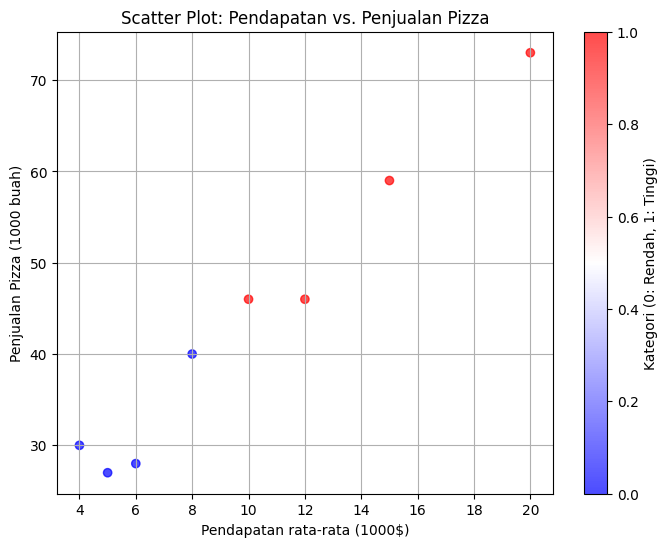

In [33]:
#Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Pendapatan"], df["Penjualan_Pizza"], c=df["Kategori"], cmap='bwr', alpha=0.7)
plt.xlabel("Pendapatan rata-rata (1000$)")
plt.ylabel("Penjualan Pizza (1000 buah)")
plt.title("Scatter Plot: Pendapatan vs. Penjualan Pizza")
plt.colorbar(label="Kategori (0: Rendah, 1: Tinggi)")
plt.grid(True)
plt.show()

In [17]:
#Pisahkan data menjadi training dan testing
X = df[["Pendapatan"]]
y = df["Kategori"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
#Prediksi
y_pred = model.predict(X_test)

In [20]:
#Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
#Hasil evaluasi
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [22]:
X_values = df["Pendapatan"]
Y_values = df["Penjualan_Pizza"]

In [23]:
#Hitung slope dan intercept dengan rumus regresi linear
n = len(X_values)
X_mean = np.mean(X_values)
Y_mean = np.mean(Y_values)

slope = sum((X_values - X_mean) * (Y_values - Y_mean)) / sum((X_values - X_mean) ** 2)
intercept = Y_mean - slope * X_mean

In [24]:
#Prediksi Y menggunakan persamaan regresi
Y_pred = slope * X_values + intercept

In [25]:
#Hitung SST, SSR, SSE
SST = sum((Y_values - Y_mean) ** 2)
SSR = sum((Y_pred - Y_mean) ** 2)
SSE = sum((Y_values - Y_pred) ** 2)

In [26]:
#Hitung korelasi R
R = np.sqrt(SSR / SST)

In [27]:
#Cetak hasil perhitungan regresi linear
print("\n=== Hasil Regresi Linear ===")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"SST (Total Sum of Squares): {SST}")
print(f"SSR (Sum of Squares Regression): {SSR}")
print(f"SSE (Sum of Squares Error): {SSE}")
print(f"R (Koefisien Korelasi): {R}")


=== Hasil Regresi Linear ===
Slope: 2.9047619047619047
Intercept: 14.577380952380953
SST (Total Sum of Squares): 1829.875
SSR (Sum of Squares Regression): 1771.9047619047622
SSE (Sum of Squares Error): 57.9702380952381
R (Koefisien Korelasi): 0.9840325758520436
